# Analysis of the ArXiv data structure and dataset characteristics

In [22]:
%matplotlib inline

import os
import pickle
import matplotlib.pyplot as plt

# Path to arxiv data
filepath = "../Data/arxiv_sorted/"

In [9]:
data = {}
for file in os.listdir(filepath):
    data[file.split('.')[0]] = pickle.load(open(filepath+file, "rb"))

The data is now in a dictionary of years. Each year contains a list of entries.

In [12]:
print(list(data.keys()))

['1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


In [13]:
data['1989'][0]

{'abstract': 'a special case of the satisfiability problem, in which the clauses have a hierarchical structure, is shown to be solvable in linear time, assuming that the clauses have been represented in a convenient way.',
 'authors': ['knuth'],
 'categories': 'cs.cc',
 'created': '1989-12-31',
 'doi': '',
 'id': 'cs/9301111',
 'title': 'nested satisfiability',
 'updated': '',
 'url': 'https://arxiv.org/abs/cs/9301111'}

In [20]:
data['2018'][0]

{'abstract': 'we propose a scalable divergence estimation method based on hashing. consider two continuous random variables $x$ and $y$ whose densities have bounded support. we consider a particular locality sensitive random hashing, and consider the ratio of samples in each hash bin having non-zero numbers of y samples. we prove that the weighted average of these ratios over all of the hash bins converges to f-divergences between the two samples sets. we show that the proposed estimator is optimal in terms of both mse rate and computational complexity. we derive the mse rates for two families of smooth functions; the h\\"{o}lder smoothness class and differentiable functions. in particular, it is proved that if the density functions have bounded derivatives up to the order $d/2$, where $d$ is the dimension of samples, the optimal parametric mse rate of $o(1/n)$ can be achieved. the computational complexity is shown to be $o(n)$, which is optimal. to the best of our knowledge, this is t

### Data structure

We observe a set of dictionary keys:

- abstract (string, not cleaned)
- authors (list of strings. last names only.)
- categories (string of arxiv categories delimited by spaces. all entries have at least one cs category)
- created (string date in forma YYYY-MM-DD)
- doi (string, for instance: '10.1007/978-3-319-42108-7_31')
- id (string, for instance: '1801.00398')
- title (string, not cleaned)
- url (string, for instance: 'https://arxiv.org/abs/1801.00398')

### What's not included

There is no information about citations contained here, or author's institutions. This limits the usefulness of the data.

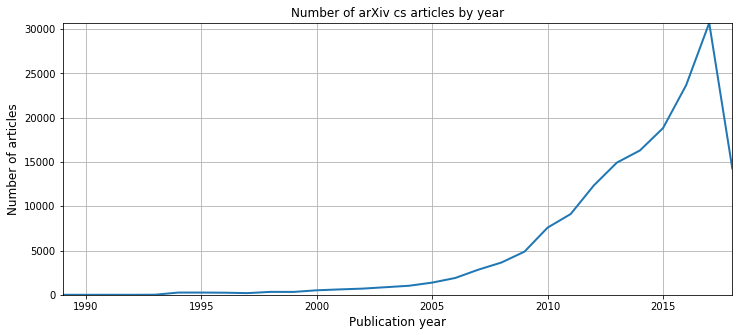

In [28]:
x = []
y = []
for key in data.keys():
    x.append(int(key))
    y.append(len(data[key]))
    
    
plt.figure(figsize=(12,5))
plt.title("Number of arXiv cs articles by year")
plt.xlabel('Publication year', fontsize=12)
plt.ylabel('Number of articles', fontsize=12)
plt.grid()
plt.xlim([1989, 2018])
plt.ylim([0, max(y)])
plt.plot(x, y, linewidth=2)


### A note on the range of the data

Looking at the graph above, the vast bulk of the data is in the more recent years. It is hard to pick an appropriate cut-off, so perhaps an arbitrary one will have to do intead. In the bulk of the analyses, we use 2008-2018